In [42]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
%matplotlib inline
%config Completer.use_jedi = False

In [43]:
benergy_c = np.arange(-7.5, -5.25, 0.25)
benergy_o = np.arange(-3.25, -5.5, -0.25)

In [44]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))

In [46]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            ch4_in = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[3.34472698e-01, 3.39231365e-01, 3.43974177e-01, 3.48933537e-01,
        3.53805206e-01, 3.58574738e-01, 3.61920092e-01, 3.56331117e-01,
        3.37657724e-01],
       [3.28533274e-01, 3.32081756e-01, 3.34938343e-01, 3.36558840e-01,
        3.36605648e-01, 3.34050485e-01, 3.20556065e-01, 2.65952313e-01,
        1.56534848e-01],
       [3.22721781e-01, 3.24506758e-01, 3.25480862e-01, 3.24254718e-01,
        3.19946102e-01, 3.06708407e-01, 2.35348070e-01, 1.28573863e-02,
        2.86525878e-03],
       [3.18202928e-01, 3.19391493e-01, 3.18920536e-01, 3.15556332e-01,
        3.05975939e-01, 2.59558304e-01, 4.26909990e-03, 5.45512506e-04,
        2.69875792e-04],
       [4.81476409e-12, 3.15230888e-01, 3.13982062e-01, 3.07922412e-01,
        2.84939373e-01, 6.28361115e-03, 1.61196623e-04, 4.37329722e-05,
        3.02454015e-05],
       [4.81739457e-12, 1.07766139e-02, 3.04515527e-01, 2.90737135e-01,
        1.56730045e-01, 9.85362170e-05, 8.53115055e-06, 4.16795459e-06,
        3.5

In [47]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,3.344727e-01,0.339231,0.343974,0.348934,3.538052e-01,3.585747e-01,3.619201e-01,3.563311e-01,3.376577e-01
-3.50,3.285333e-01,0.332082,0.334938,0.336559,3.366056e-01,3.340505e-01,3.205561e-01,2.659523e-01,1.565348e-01
-3.75,3.227218e-01,0.324507,0.325481,0.324255,3.199461e-01,3.067084e-01,2.353481e-01,1.285739e-02,2.865259e-03
-4.00,3.182029e-01,0.319391,0.318921,0.315556,3.059759e-01,2.595583e-01,4.269100e-03,5.455125e-04,2.698758e-04
-4.25,4.814764e-12,0.315231,0.313982,0.307922,2.849394e-01,6.283611e-03,1.611966e-04,4.373297e-05,3.024540e-05
-4.50,4.817395e-12,0.010777,0.304516,0.290737,1.567300e-01,9.853622e-05,8.531151e-06,4.167955e-06,3.522546e-06
-4.75,4.818217e-12,0.010759,0.270742,0.202066,2.165198e-04,2.533383e-06,6.041852e-07,4.370454e-07,4.096711e-07
-5.00,4.815915e-12,0.010758,0.100732,0.000547,1.574094e-06,1.145545e-07,5.553824e-08,4.792424e-08,4.664699e-08
-5.25,4.816573e-12,0.010750,0.004595,0.000002,2.778168e-08,6.962190e-09,4.951395e-09,4.636718e-09,4.577069e-09


In [25]:
# metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':-7.33484, 'O':-4.71419}, 
#           'Ru': {'C':-7.5979, 'O':-5.4492}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metals = {'Pt': {'C':-7.02516, 'O':-3.81153}, 'Pd':{'C':-7.16786, 'O':-4.13577}, 'Rh':{'C':(-6.65 - 7.11) / 2, 'O':(-4.31 - 4.88) / 2}, 'Ni': {'C':-6.79794, 'O':-4.98902}}
metal_x = []
metal_y = []
metal_names = []
for i, v in metals.items():
    metal_x.append(abs(v['C'] + 7.5) / 2.25 * 9)
    metal_y.append(abs(v['O'] + 3.125) / 2.25 * 9)
    metal_names.append(i)

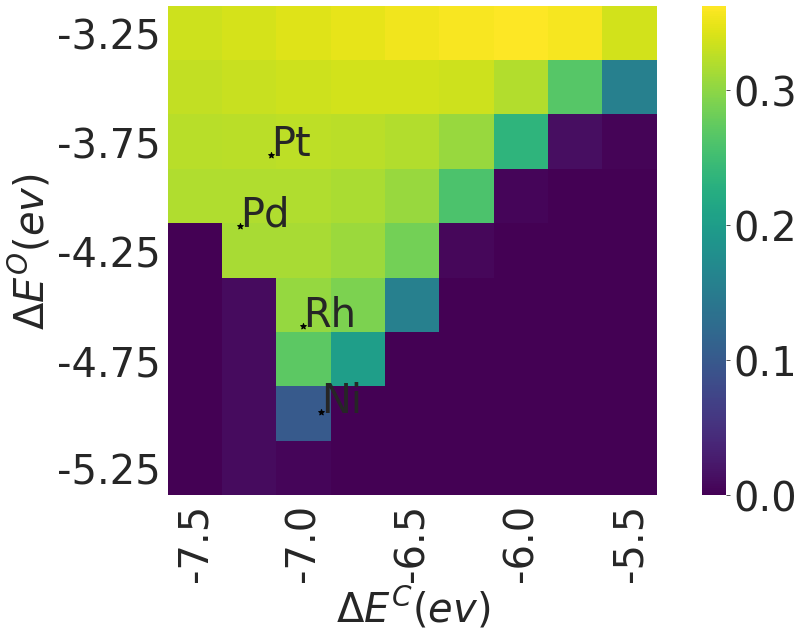

In [26]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_ch4_conv_bma.pdf', bbox_inches='tight')

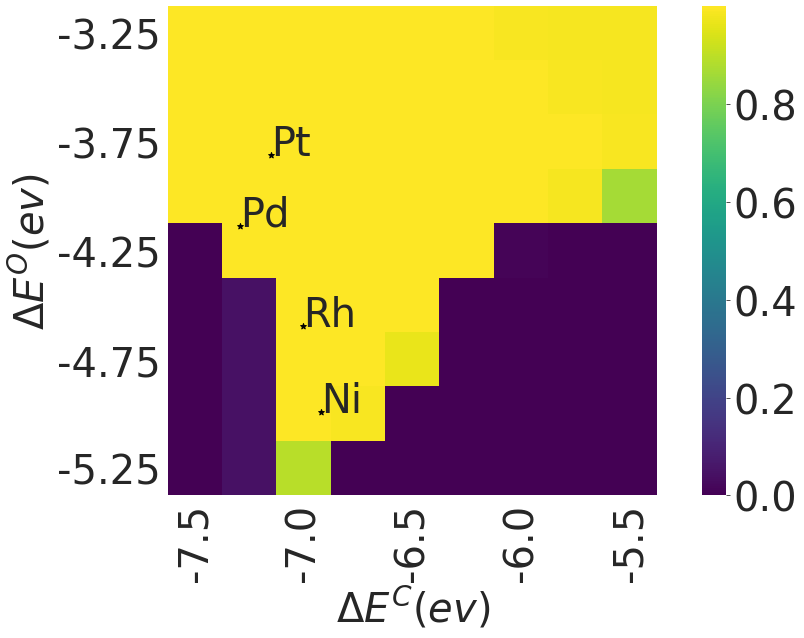

In [28]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/complete_0.6_ch4_conv_bma.pdf', bbox_inches='tight')

# Heatmap For Syngas Conversion

In [30]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO out'].to_list()[0]
            syngas_conv = co_out + h2_out
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(syngas_conv)
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[9.83708320e-02, 9.83509009e-02, 9.83292896e-02, 9.82979901e-02,
        9.82207598e-02, 9.77997591e-02, 9.41083062e-02, 8.21008097e-02,
        6.57414103e-02],
       [9.83890939e-02, 9.83771744e-02, 9.83646502e-02, 9.83483011e-02,
        9.83170169e-02, 9.82118118e-02, 9.75599632e-02, 9.30645568e-02,
        8.06662307e-02],
       [9.84009343e-02, 9.83940089e-02, 9.83862550e-02, 9.83760023e-02,
        9.83583378e-02, 9.83125428e-02, 9.81076777e-02, 9.67286724e-02,
        9.00226369e-02],
       [9.84042463e-02, 9.83997313e-02, 9.83951748e-02, 9.83881810e-02,
        9.83755412e-02, 9.83424936e-02, 9.81097400e-02, 9.38193300e-02,
        5.24211033e-02],
       [2.29531751e-10, 9.83981989e-02, 9.83951093e-02, 9.83905833e-02,
        9.83798269e-02, 9.83008340e-02, 1.13547146e-06, 1.47366479e-07,
        9.69264174e-08],
       [2.29531508e-10, 5.61100324e-03, 9.83915472e-02, 9.83872241e-02,
        9.83660109e-02, 2.09128049e-06, 1.88300457e-07, 6.37741462e-08,
        2.8

In [32]:
syngas_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
syngas_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,9.837083e-02,0.098351,0.098329,0.098298,9.822076e-02,9.779976e-02,9.410831e-02,8.210081e-02,6.574141e-02
-3.50,9.838909e-02,0.098377,0.098365,0.098348,9.831702e-02,9.821181e-02,9.755996e-02,9.306456e-02,8.066623e-02
-3.75,9.840093e-02,0.098394,0.098386,0.098376,9.835834e-02,9.831254e-02,9.810768e-02,9.672867e-02,9.002264e-02
-4.00,9.840425e-02,0.098400,0.098395,0.098388,9.837554e-02,9.834249e-02,9.810974e-02,9.381933e-02,5.242110e-02
-4.25,2.295318e-10,0.098398,0.098395,0.098391,9.837983e-02,9.830083e-02,1.135471e-06,1.473665e-07,9.692642e-08
-4.50,2.295315e-10,0.005611,0.098392,0.098387,9.836601e-02,2.091280e-06,1.883005e-07,6.377415e-08,2.884025e-08
-4.75,2.295314e-10,0.005577,0.098386,0.098375,8.895366e-02,4.719074e-07,5.619808e-08,1.212397e-08,3.419132e-09
-5.00,2.295316e-10,0.005573,0.098353,0.096840,1.057641e-06,3.310383e-08,4.056617e-09,8.253459e-10,2.445669e-10
-5.25,2.295315e-10,0.005570,0.090371,0.000003,1.875184e-08,1.316121e-09,2.122360e-10,6.105644e-11,3.422242e-11


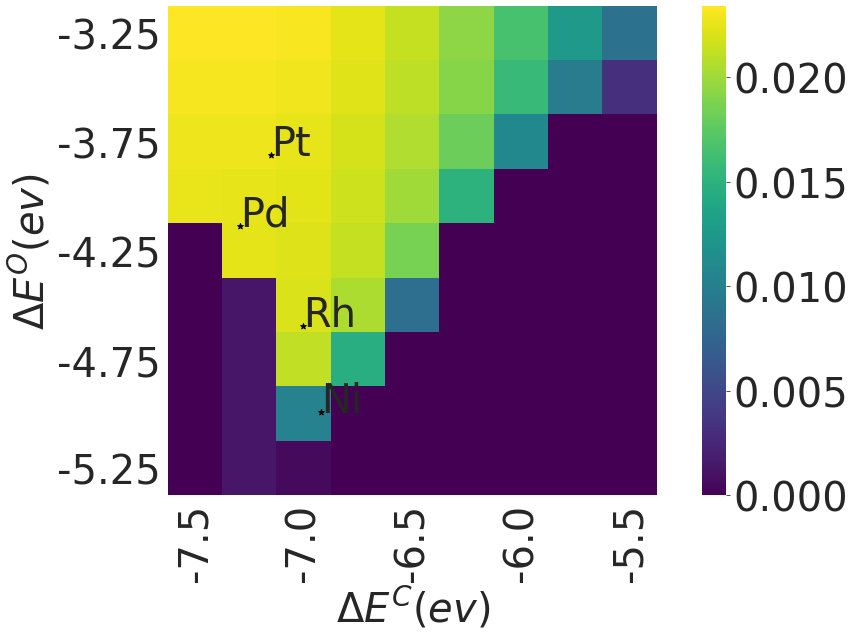

In [10]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/0.6_syngas_conv_bma.pdf', bbox_inches='tight')

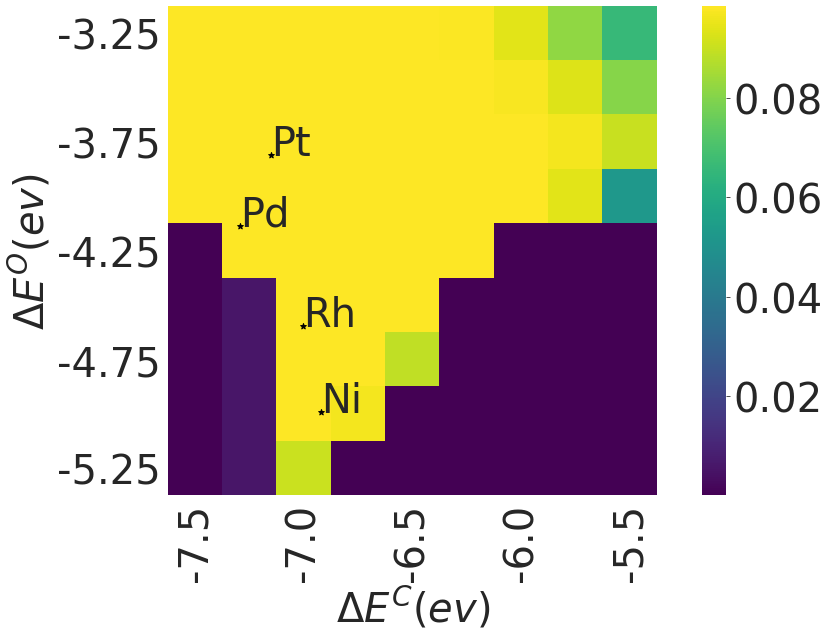

In [33]:
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=0.6 without BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
plt.savefig('paper_plots/complete_0.6_syngas_conv_bma.pdf', bbox_inches='tight')

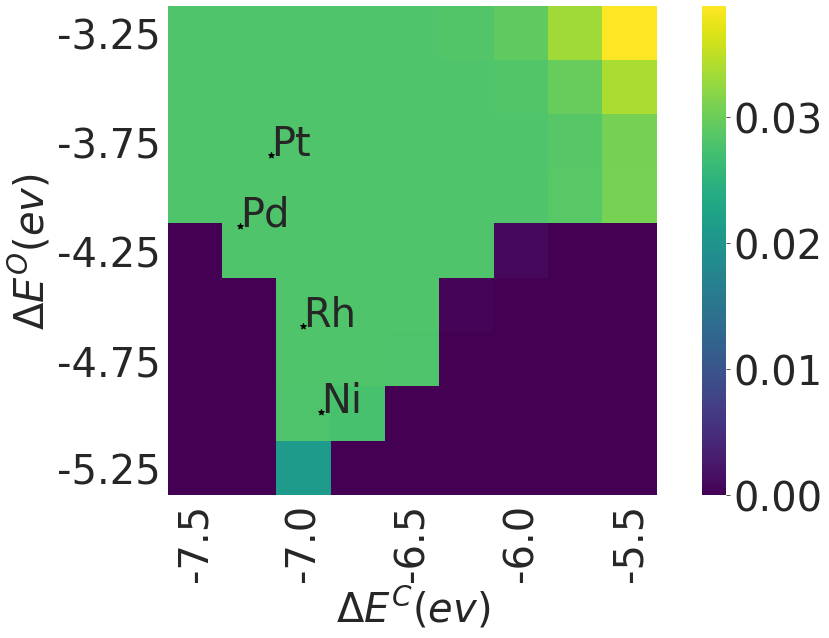

In [35]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 0.6].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(h2o_out) + abs(co2_out)
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=0.6 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/0.6_full_conv_bma.pdf', bbox_inches='tight')
plt.savefig('paper_plots/complete_0.6_full_conv_bma.pdf', bbox_inches='tight')

# Plots at C/O=1.0

In [38]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            h2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            syngas_conv = (co_out + h2_out) / ch4_in            
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
            data_syngas[j][i] = syngas_conv
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[8.18994302e-11, 3.21699469e-02, 8.35693866e-01, 7.75181306e-01,
        7.25862189e-01, 7.16786414e-01, 7.62775406e-01, 8.26120332e-01,
        8.76822016e-01],
       [8.18971926e-11, 3.86946658e-02, 8.56773483e-01, 8.07175841e-01,
        7.64871031e-01, 7.25023507e-01, 7.26338036e-01, 7.74795754e-01,
        8.30367579e-01],
       [8.18612793e-11, 3.44835700e-02, 8.96499140e-01, 8.45608363e-01,
        7.95227664e-01, 7.46595538e-01, 7.17918276e-01, 7.34094967e-01,
        7.75961860e-01],
       [8.18792919e-11, 2.87867582e-02, 9.17927096e-01, 8.67922444e-01,
        8.14026805e-01, 7.64006532e-01, 7.25953144e-01, 7.11896147e-01,
        7.16894733e-01],
       [8.19304208e-11, 2.70041195e-02, 9.30488266e-01, 8.84949120e-01,
        8.32056640e-01, 7.82511176e-01, 7.21700574e-01, 2.65637505e-03,
        1.33589388e-03],
       [8.18755999e-11, 2.67212005e-02, 9.32210760e-01, 9.05573783e-01,
        8.59285329e-01, 7.87295051e-01, 4.11651643e-04, 1.63209076e-04,
        1.3

In [39]:
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
ch4_conv_df

,-7.50,-7.25,-7.00,-6.75,-6.50,-6.25,-6.00,-5.75,-5.50
-3.25,8.189943e-11,0.032170,0.835694,0.775181,0.725862,7.167864e-01,7.627754e-01,8.261203e-01,8.768220e-01
-3.50,8.189719e-11,0.038695,0.856773,0.807176,0.764871,7.250235e-01,7.263380e-01,7.747958e-01,8.303676e-01
-3.75,8.186128e-11,0.034484,0.896499,0.845608,0.795228,7.465955e-01,7.179183e-01,7.340950e-01,7.759619e-01
-4.00,8.187929e-11,0.028787,0.917927,0.867922,0.814027,7.640065e-01,7.259531e-01,7.118961e-01,7.168947e-01
-4.25,8.193042e-11,0.027004,0.930488,0.884949,0.832057,7.825112e-01,7.217006e-01,2.656375e-03,1.335894e-03
-4.50,8.187560e-11,0.026721,0.932211,0.905574,0.859285,7.872951e-01,4.116516e-04,1.632091e-04,1.313614e-04
-4.75,8.188063e-11,0.026683,0.241627,0.927016,0.888217,1.562749e-04,2.380972e-05,1.607831e-05,1.487369e-05
-5.00,8.187437e-11,0.026678,0.142237,0.939809,0.000141,4.768543e-06,2.048128e-06,1.727554e-06,1.674046e-06
-5.25,8.184741e-11,0.026672,0.128605,0.000167,0.000001,2.248720e-07,1.570362e-07,1.464443e-07,1.442471e-07


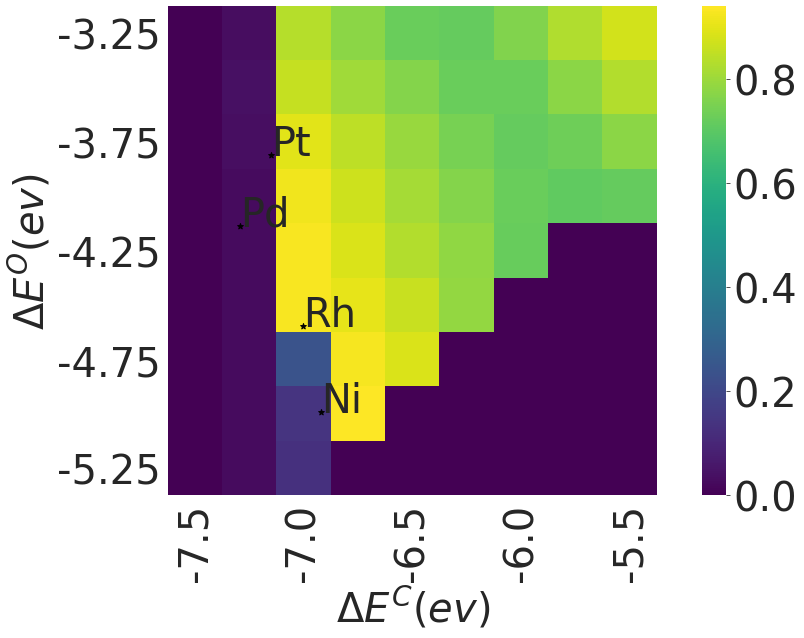

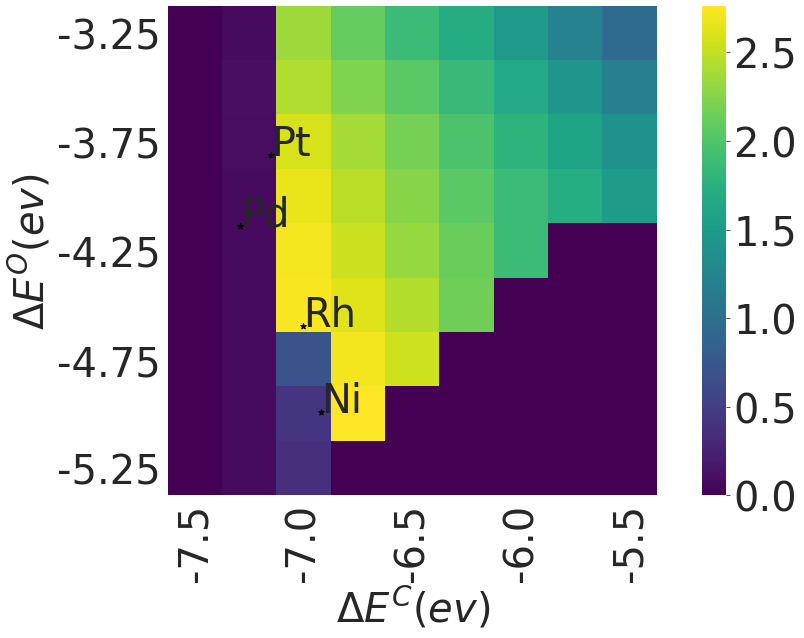

In [40]:
# plot CH4 conversion
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="CH4 Conversion at C/O=1 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/1_ch4_conv_bma.pdf', bbox_inches='tight')
plt.savefig('paper_plots/complete_1_ch4_conv_bma.pdf', bbox_inches='tight')



syngas_conv_df = pd.DataFrame(data_syngas, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Syngas Conversion at C/O=1 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/1_syngas_conv_bma.pdf', bbox_inches='tight')
plt.savefig('paper_plots/complete_1_syngas_conv_bma.pdf', bbox_inches='tight')

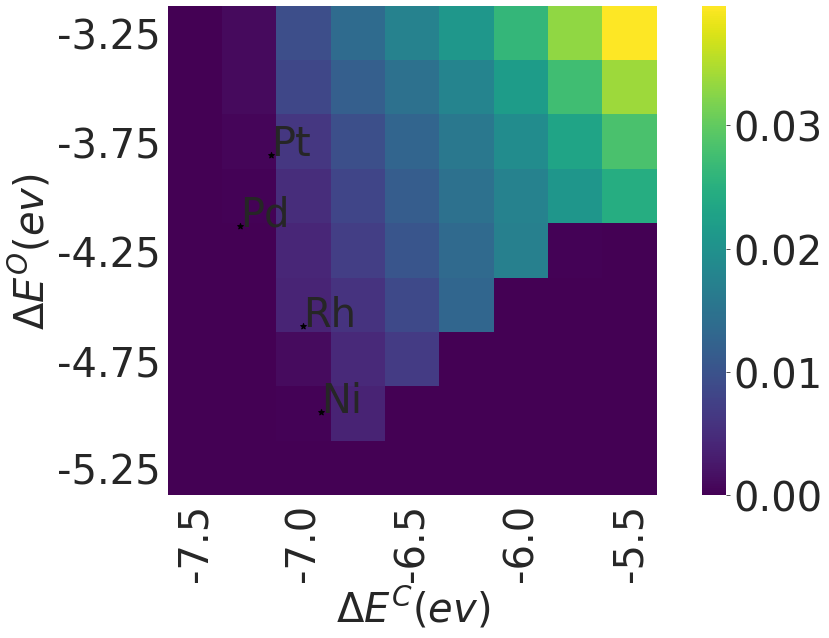

In [41]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            # f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/complete_rtol_1e-08_atol_1e-16_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            co2_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'CO2 out'].to_list()[0]
            h2o_out = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'H2O out'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            data[j][i] = abs(h2o_out) + abs(co2_out)
        except Exception as e:
            print(e, f"check log files {index}")
full_ox_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(full_ox_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
xticks = ax.xaxis.get_major_ticks()
yticks = ax.yaxis.get_major_ticks()
for i in range(len(xticks)-1):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
for i in range(len(yticks)-1):
    if i % 2 != 0:
        yticks[i].label1.set_visible(False)
# ax.set(title="Full Oxidation at C/O=1.0 with BMA",
#       xlabel="$\\Delta E^C(ev)$",
#       ylabel="$\\Delta E^O(ev)$",)
ax.set(xlabel="$\\Delta E^C(ev)$",
       ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
ax.scatter(metal_x, metal_y, marker='*', color='black')
for i, txt in enumerate(metal_names):
    ax.annotate(txt,(metal_x[i], metal_y[i]))
# plt.savefig('paper_plots/1_full_conv_bma.pdf', bbox_inches='tight')
plt.savefig('paper_plots/complete_1_full_conv_bma.pdf', bbox_inches='tight')

# Plots at C/O=2.6

In [8]:
data = np.zeros((len(benergy_c), len(benergy_o)))
data_syngas = np.zeros((len(benergy_c), len(benergy_o)))
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-08_atol_1e-08_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
#             ch4_conv = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'Max CH4 Conv'].to_list()[0]
            h2_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'H2 out'].to_list()[0]
            co_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CO out'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            ch4_in = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 in'].to_list()[0]
            ch4_out = df.loc[df['C/O ratio'].round(2) == 2.6].loc[:,'CH4 out'].to_list()[0]
            ch4_conv = (ch4_in - ch4_out) / ch4_in
            syngas_conv = (co_out + h2_out/2) / ch4_in    
            if abs(ch4_conv) > 1:
                data[j][i] = 0
            else:
                data[j][i] = abs(ch4_conv)
            data_syngas[j][i] = syngas_conv
        except Exception as e:
            print(e, f"check log files {index}")
data 

array([[9.32796404e-12, 2.02187244e-11, 1.25446355e-02, 7.13776542e-02,
        8.25430848e-02, 8.04320037e-02, 7.50866985e-02, 7.11677491e-02,
        7.08777937e-02],
       [9.30374742e-12, 7.13505379e-11, 1.40315794e-02, 7.63880970e-02,
        9.01140160e-02, 8.64126919e-02, 7.71896725e-02, 6.75062703e-02,
        6.01168739e-02],
       [9.32378002e-12, 2.01942542e-11, 1.55870214e-02, 9.12659470e-02,
        1.00592896e-01, 9.20317423e-02, 7.87417746e-02, 5.96140443e-02,
        4.18800118e-02],
       [9.32479433e-12, 2.01818289e-11, 1.47133211e-02, 1.06306745e-01,
        1.10509894e-01, 9.71485333e-02, 7.31566892e-02, 1.05535267e-02,
        1.80947222e-03],
       [1.71410579e-11, 2.01800538e-11, 1.32433731e-02, 1.15898713e-01,
        1.20307755e-01, 9.92964546e-02, 3.57380201e-03, 2.87164516e-04,
        1.50949736e-04],
       [9.26875377e-12, 2.01780252e-11, 1.26730345e-02, 1.13045240e-01,
        1.29035249e-01, 3.75081648e-02, 7.89622606e-05, 2.15760748e-05,
        1.5

[Text(0.5, 1.0, 'Syngas Conversion at C/O=2.6 with BMA'),
 Text(0.5, 30.0, '$\\Delta E^C(ev)$'),
 Text(318.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

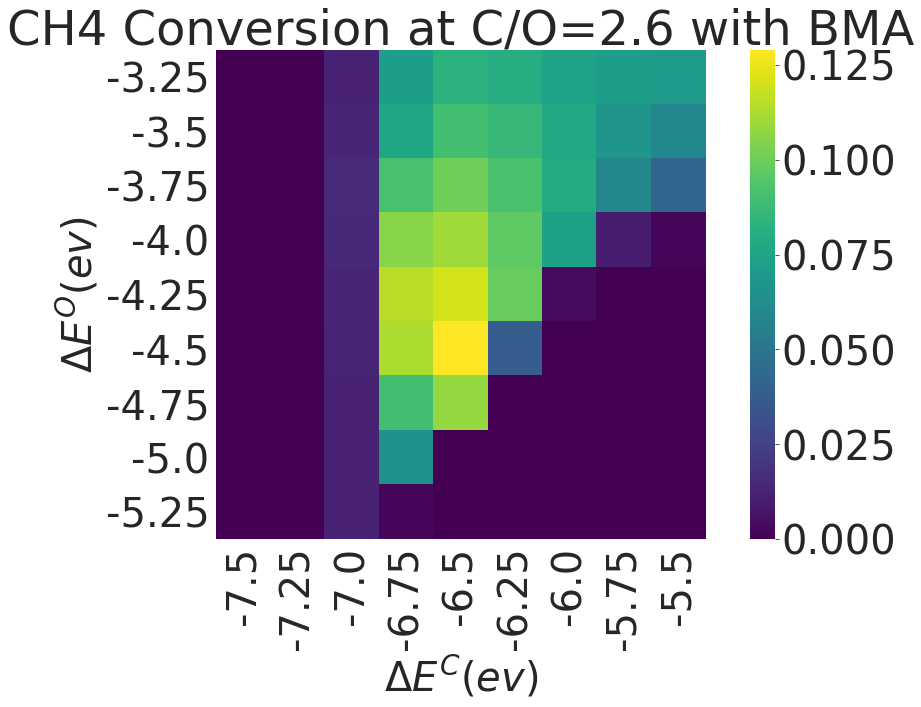

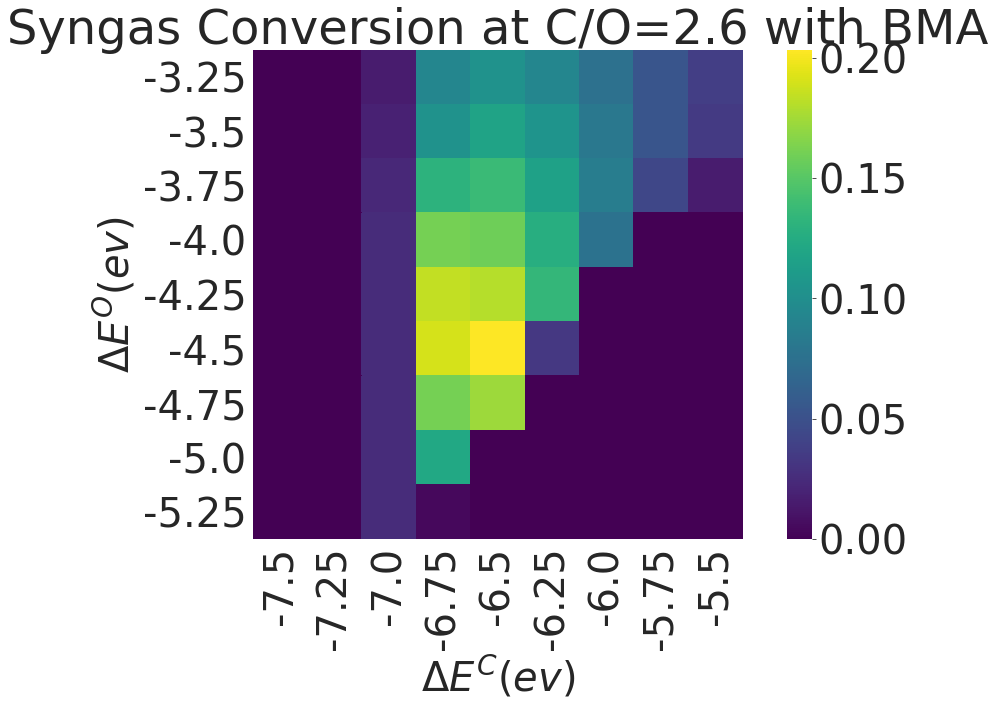

In [9]:
# plot CH4 conversion
ch4_conv_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
# cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ch4_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
ax.set(title="CH4 Conversion at C/O=2.6 with BMA",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))





syngas_conv_df = pd.DataFrame(data_syngas, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(syngas_conv_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, vmin=0, cmap=cmap)
ax.set(title="Syngas Conversion at C/O=2.6 with BMA",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

## Plot the volcano plots for half change distance

In [19]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            half_conc_dist = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Dist to 50 CH4 Conv'].to_list()[0]
#             if abs(syngas_conv) > 1:
#                 data[j][i] = 0
#             else:
            if half_conc_dist == 510:
                data[j][i] = 0
            else:
                data[j][i] = abs(half_conc_dist)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '23.0_c-6.00o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 23.0
[Errno 2] No such file or directory: '10.0_c-5.75o-3.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 10.0
[Errno 2] No such file or directory: '14.0_c-5.75o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 14.0
[Errno 2] No such file or directory: '15.0_c-5.75o-4.50/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 15.0
[Errno 2] No such file or directory: '4.0_c-5.50o-4.00/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 4.0
[Errno 2] No such file or directory: '5.0_c-5.50o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 5.0


array([[ 0.  , 12.83, 10.12, 10.08, 10.08, 10.11, 10.13,  0.  ,  0.  ],
       [ 0.  , 12.4 , 10.09, 10.07, 10.08, 10.08, 10.11,  0.  ,  0.  ],
       [ 0.  , 13.13, 10.06, 10.06, 10.06, 10.09, 10.1 ,  0.  ,  0.  ],
       [ 0.  , 17.83, 10.06, 10.05, 10.06, 10.07,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 10.05, 10.05, 10.05, 10.08,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 10.21, 10.05, 10.05,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 10.77, 10.06, 10.11, 16.22,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 11.7 , 10.07, 15.9 ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 11.89, 16.6 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

[Text(0.5, 1.0, 'half concentration disctantces'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

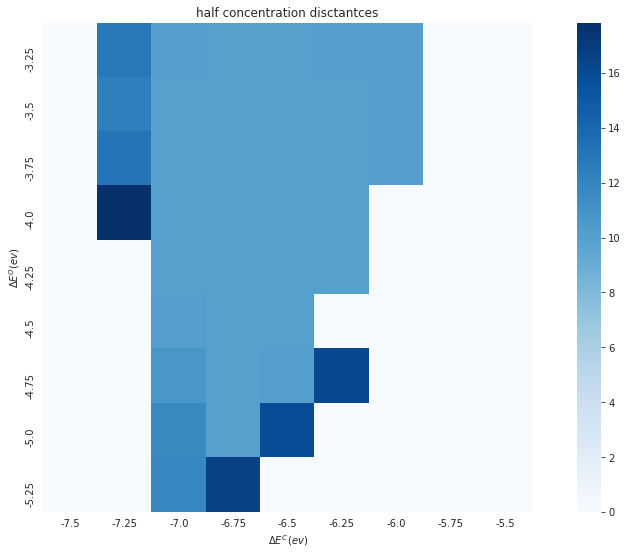

In [20]:
half_conc_dist_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(half_conc_dist_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="half concentration disctantces",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

## Distances to max temperature

In [21]:
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1

        try:
            f_path = '{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(index, c_binding_energy, o_binding_energy)
            df = pd.read_csv(f_path)
            max_temp_dist = df.loc[df['C/O ratio'].round(2) == 1.0].loc[:,'Dist to max temp'].to_list()[0]
            data[j][i] = abs(max_temp_dist)
        except Exception as e:
            print(e, f"check log files {index}")
data 

[Errno 2] No such file or directory: '23.0_c-6.00o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 23.0
[Errno 2] No such file or directory: '10.0_c-5.75o-3.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 10.0
[Errno 2] No such file or directory: '14.0_c-5.75o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 14.0
[Errno 2] No such file or directory: '15.0_c-5.75o-4.50/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 15.0
[Errno 2] No such file or directory: '4.0_c-5.50o-4.00/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 4.0
[Errno 2] No such file or directory: '5.0_c-5.50o-4.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 5.0


array([[10.  , 13.49, 10.31, 10.24, 10.22, 10.25, 10.25,  0.  , 10.03],
       [10.01, 12.95, 10.25, 10.18, 10.19, 10.2 , 10.24, 10.03, 10.01],
       [10.  , 13.67, 10.15, 10.13, 10.15, 10.21, 10.24, 10.01, 10.03],
       [10.01, 18.79, 10.1 , 10.11, 10.14, 10.18, 10.02, 10.09,  0.  ],
       [10.  , 70.  , 10.08, 10.09, 10.13, 10.19,  0.  ,  0.  ,  0.  ],
       [10.  , 70.  , 10.26, 10.07, 10.1 , 10.04, 12.96,  0.  , 70.  ],
       [10.01, 70.  , 10.97, 10.06, 10.13, 16.25, 70.  , 70.  , 70.  ],
       [10.  , 70.  , 19.99, 10.08, 15.91, 70.  , 70.  , 70.  , 70.  ],
       [10.01, 70.  , 19.99, 16.64, 70.  , 70.  , 70.  , 70.  , 70.  ]])

[Text(0.5, 1.0, 'half concentration disctantces'),
 Text(0.5, 60.0, '$\\Delta E^C(ev)$'),
 Text(348.0000000000001, 0.5, '$\\Delta E^O(ev)$')]

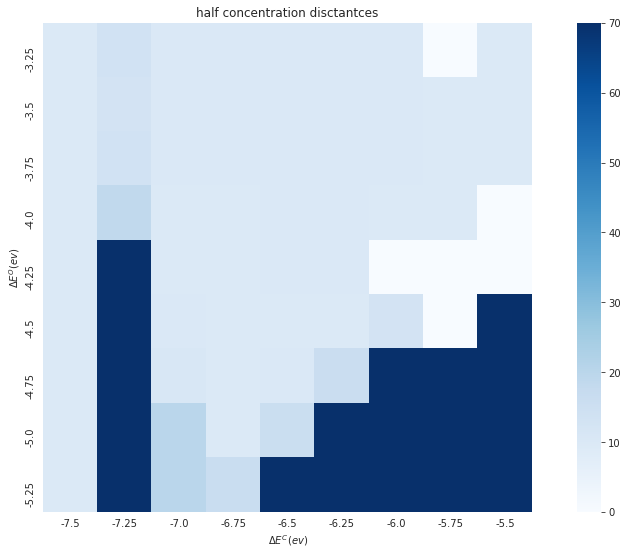

In [22]:
max_temp_dist_df = pd.DataFrame(data, columns=benergy_c, index=benergy_o)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, aspect='equal')
# ax = fig.add_subplot(111, aspect='equal')
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(max_temp_dist_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap)
ax.set(title="half concentration disctantces",
      xlabel="$\\Delta E^C(ev)$",
      ylabel="$\\Delta E^O(ev)$",)
# ax.scatter(9, 9, marker='*', s=100, color='yellow')
# ax.scatter(metal_x, metal_y, marker='*', color='black')
# for i, txt in enumerate(metal_names):
#     ax.annotate(txt,(metal_x[i], metal_y[i]))

In [18]:
import shutil
rtols = [1.0e-10, 1.0e-09, 1.0e-08, 1.0e-07, 1.0e-06]
atols = [1.0e-20, 1.0e-18, 1.0e-16, 1.0e-14, 1.0e-12]
tol_combs = []
for index in range(len(rtols)):
    tol_combs.append([rtols[index], atols[index]])
total = 81
i = -1
paths = []
for c_binding_energy in benergy_c:
    i += 1
    j = -1
    index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
    for o_binding_energy in benergy_o:
        j += 1
        index += 1
        for tol_comb in tol_combs:
            f_path = '{}_c{:.2f}o{:.2f}/rtol_{}_atol_{}'.format(index, c_binding_energy, o_binding_energy, tol_comb[0], tol_comb[1])
            print(f_path)
            shutil.rmtree(f_path)

73.0_c-7.50o-3.25/rtol_1e-10_atol_1e-20
73.0_c-7.50o-3.25/rtol_1e-09_atol_1e-18
73.0_c-7.50o-3.25/rtol_1e-08_atol_1e-16
73.0_c-7.50o-3.25/rtol_1e-07_atol_1e-14
73.0_c-7.50o-3.25/rtol_1e-06_atol_1e-12
74.0_c-7.50o-3.50/rtol_1e-10_atol_1e-20
74.0_c-7.50o-3.50/rtol_1e-09_atol_1e-18
74.0_c-7.50o-3.50/rtol_1e-08_atol_1e-16
74.0_c-7.50o-3.50/rtol_1e-07_atol_1e-14
74.0_c-7.50o-3.50/rtol_1e-06_atol_1e-12
75.0_c-7.50o-3.75/rtol_1e-10_atol_1e-20
75.0_c-7.50o-3.75/rtol_1e-09_atol_1e-18
75.0_c-7.50o-3.75/rtol_1e-08_atol_1e-16
75.0_c-7.50o-3.75/rtol_1e-07_atol_1e-14
75.0_c-7.50o-3.75/rtol_1e-06_atol_1e-12
76.0_c-7.50o-4.00/rtol_1e-10_atol_1e-20
76.0_c-7.50o-4.00/rtol_1e-09_atol_1e-18
76.0_c-7.50o-4.00/rtol_1e-08_atol_1e-16
76.0_c-7.50o-4.00/rtol_1e-07_atol_1e-14
76.0_c-7.50o-4.00/rtol_1e-06_atol_1e-12
77.0_c-7.50o-4.25/rtol_1e-10_atol_1e-20
77.0_c-7.50o-4.25/rtol_1e-09_atol_1e-18
77.0_c-7.50o-4.25/rtol_1e-08_atol_1e-16
77.0_c-7.50o-4.25/rtol_1e-07_atol_1e-14
77.0_c-7.50o-4.25/rtol_1e-06_atol_1e-12
